In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/TIRUPATHI/Downloads/end_to_end_sales_and_profit/raw superstore sample data/superstore_sample.csv")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df["Order Date"]=pd.to_datetime(df["Order Date"],errors='coerce')

In [12]:
df["Ship Date"]=pd.to_datetime(df["Ship Date"],errors='coerce')

In [13]:
df["Profit_Margin"]=df["Profit"]/df["Sales"]

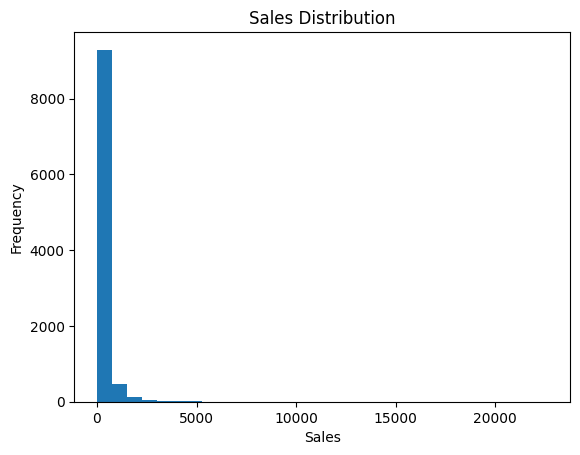

In [14]:
plt.hist(df["Sales"], bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

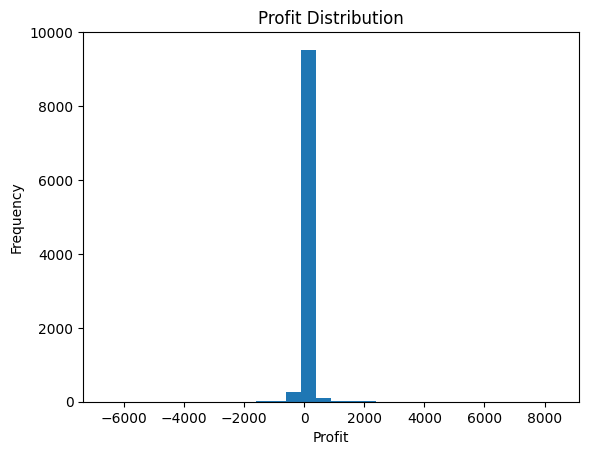

In [32]:
plt.hist(df["Profit"], bins=30)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

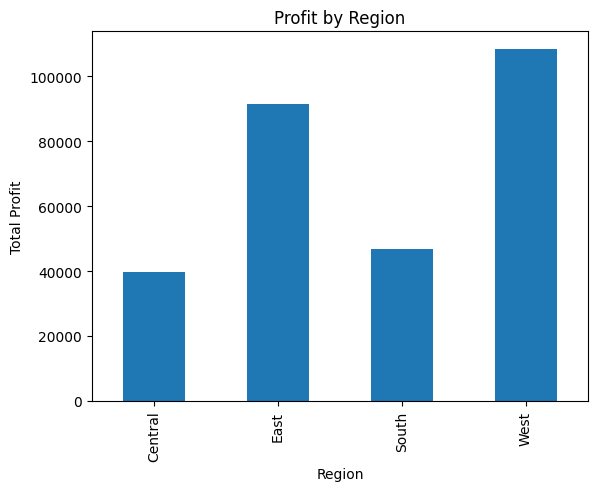

In [16]:
region_profit = df.groupby("Region")["Profit"].sum()
region_profit.plot(kind="bar")
plt.title("Profit by Region")
plt.ylabel("Total Profit")
plt.show()

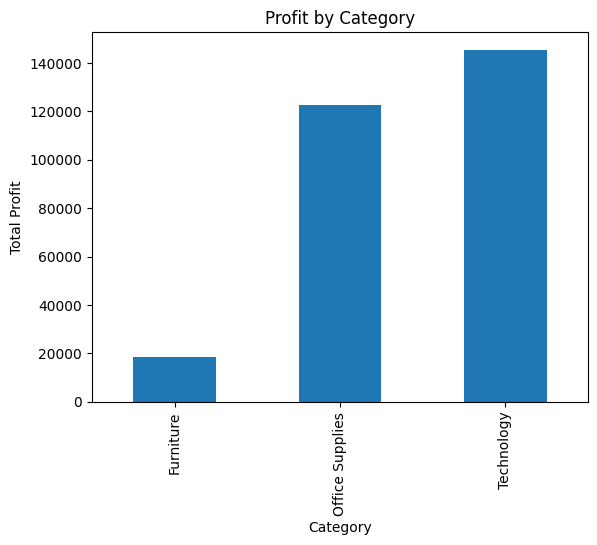

In [17]:
category_profit = df.groupby("Category")["Profit"].sum()
category_profit.plot(kind="bar")
plt.title("Profit by Category")
plt.ylabel("Total Profit")
plt.show()

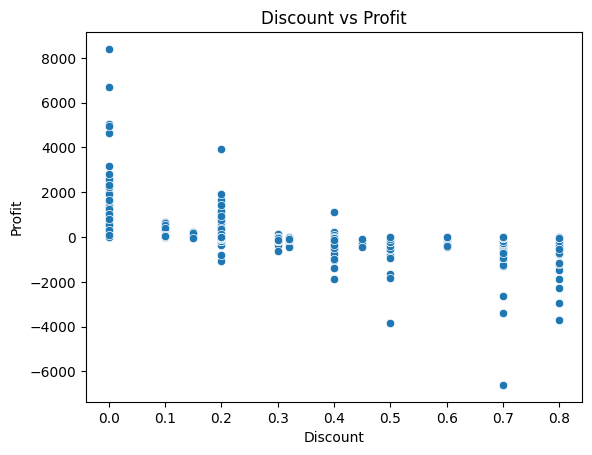

In [18]:
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit")
plt.show()

In [19]:
loss_subcat = (df.groupby("Sub-Category")["Profit"].sum().sort_values())
loss_subcat.head(10)

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Name: Profit, dtype: float64

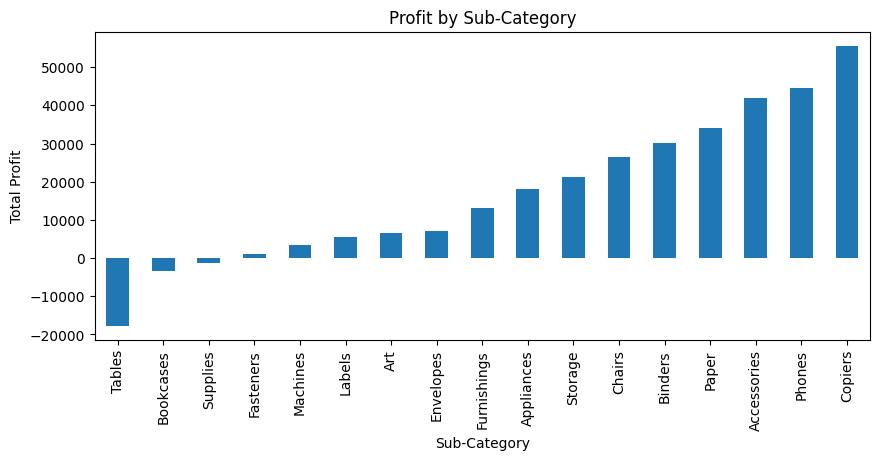

In [20]:
loss_subcat.plot(kind="bar", figsize=(10,4))
plt.title("Profit by Sub-Category")
plt.ylabel("Total Profit")
plt.show()

In [21]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_discount = df["Discount"].mean()
avg_profit_margin = df["Profit_Margin"].mean()
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Discount:", avg_discount)
print("Average Profit Margin:", avg_profit_margin)

Total Sales: 2297200.8603
Total Profit: 286397.0217
Average Discount: 0.1562027216329798
Average Profit Margin: 0.12031392972104457


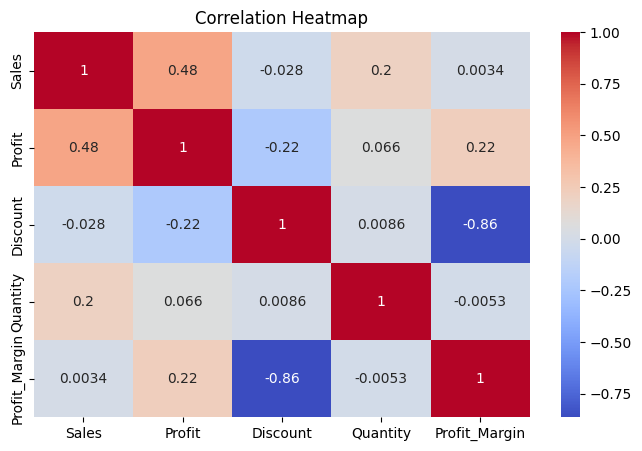

In [22]:
num_cols = ["Sales", "Profit", "Discount", "Quantity", "Profit_Margin"]
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
segment_analysis = (df.groupby(["Region", "Category"])["Profit"].sum().reset_index())
segment_analysis.head()

,Region,Category,Profit
0,Central,Furniture,-2871.0494
1,Central,Office Supplies,8879.9799
2,Central,Technology,33697.4320
3,East,Furniture,3046.1658
4,East,Office Supplies,41014.5791


In [24]:
assert df["Sales"].ge(0).all()
assert df["Discount"].between(0,1).all()

In [25]:
df["Profit_Margin"].describe()

count    9994.000000
mean        0.120314
std         0.466754
min        -2.750000
25%         0.075000
50%         0.270000
75%         0.362500
max         0.500000
Name: Profit_Margin, dtype: float64

In [26]:
df.groupby("Discount")["Profit"].mean().head()

Discount
0.00    66.900292
0.10    96.055074
0.15    27.288298
0.20    24.702572
0.30   -45.679636
Name: Profit, dtype: float64

In [27]:
df.groupby("Region")[["Sales","Profit"]].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


In [29]:
region_profit.to_csv("C:/Users/TIRUPATHI/Downloads/end_to_end_sales_and_profit/Outputs/region_profit.csv")
category_profit.to_csv("C:/Users/TIRUPATHI/Downloads/end_to_end_sales_and_profit/Outputs/category_profit.csv")
loss_subcat.to_csv("C:/Users/TIRUPATHI/Downloads/end_to_end_sales_and_profit/Outputs/loss_subcategory.csv")

In [31]:
df.to_csv("C:/Users/TIRUPATHI/Downloads/end_to_end_sales_and_profit/raw superstore sample data/superstore_sample.csv",index=False)